In [1]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
trans = pd.read_csv('../../DataPlus/all_transcripts.csv')

In [3]:
merged = pd.read_csv('../../DataPlus/all_data_merged.csv')

# Learning Curve

In [4]:
import BaselineModel as bm

In [8]:
model_df = bm.model_dataframe(merged)

In [9]:
import KFoldBaseline as kfb

In [10]:
kfb.strat_kfold_model(model_df, 10, 100)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


AVG METRICS:

Surveillance Class Precision: 0.654

Surveillance Class Recall: 0.536

Treatment Class Precision: 0.841

Treatment Class Recall: 0.89



(0.6538762765012766,
 0.5363272727272728,
 0.8412483674591053,
 0.8897486772486779)

In [11]:
import Stats as stats

In [12]:
stats.random_prediction(.27, True)

AVG METRICS:

(+) Class Precision: 0.27

(+) Class Recall: 0.27

(-) Class Precision: 0.73

(-) Class Recall: 0.73



In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# digits = load_digits()
# X, y = digits.data, digits.target


# title = "Learning Curves (Naive Bayes)"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = GaussianNB()
# plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

# title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

# plt.show()

Automatically created module for IPython interactive environment


In [14]:
%matplotlib inline

In [15]:
model_df.head()

,gleason,age,active_surv
0,7.0,-2.534141,0.0
1,7.0,-0.942449,0.0
2,6.0,-1.376547,0.0
3,7.0,0.359844,0.0
4,6.0,-1.521246,1.0


In [18]:
gleason_dummy = pd.get_dummies(model_df['gleason'], drop_first=True)
model_df = pd.concat([model_df.drop(['gleason'], axis=1), gleason_dummy], axis=1)

In [19]:
model_df.head()

,age,active_surv,7.0
0,-2.534141,0.0,1
1,-0.942449,0.0,1
2,-1.376547,0.0,0
3,0.359844,0.0,1
4,-1.521246,1.0,0


In [23]:
X = model_df[['age', 7.0]]
y = model_df['active_surv']

In [24]:
from sklearn.svm import SVC

<module 'matplotlib.pyplot' from 'C:\\Users\\grant\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

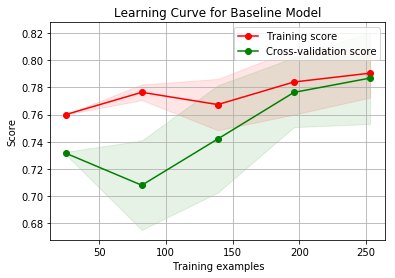

In [26]:
plot_learning_curve(SVC(), 'Learning Curve for Baseline Model', X, y)

# Text Classification

In [4]:
import Preprocessing as pre
import KFoldTextClassification as ktc
import CompilingCorpus as cc

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\grant\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [5]:
PROCESS_PIPELINE = [
    pre.remove_non_alpha,
    pre.remove_parentheses,
    pre.make_lowercase,
    pre.remove_stopwords,
    pre.lemmatize
]

In [6]:
# takes dataframe and processes it for text classification
def create_text_df(df):
    dropped_df = df.dropna(subset=['Convo_1', 'txgot_binary'])
    
    # preprocesses transcripts
    col_processed = [pre.text_preprocessing(text, PROCESS_PIPELINE) for text in tqdm(dropped_df['Convo_1'])]
    dropped_df['Convo_1'] = cc.untokenize(col_processed)
    
    return dropped_df

In [7]:
text_df = create_text_df(merged)

HBox(children=(IntProgress(value=0, max=356), HTML(value='')))

C:\Users\grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
decision_values, _ = ktc.strat_kfold_text(text_df, folds=10, iterations=1)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

[22  1  5  9]
[15  8  3 10]
[18  5  7  6]
[21  2  5  8]
[22  1  3 10]
[22  0  7  6]
[20  2  4  9]
[20  2  5  8]
[18  4  1 12]
[20  2  9  4]

AVG METRICS:

Surveillance Class Precision: 0.774

Surveillance Class Recall: 0.626

Treatment Class Precision: 0.808

Treatment Class Recall: 0.881



In [9]:
text_df['decision_values'] = decision_values

C:\Users\grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

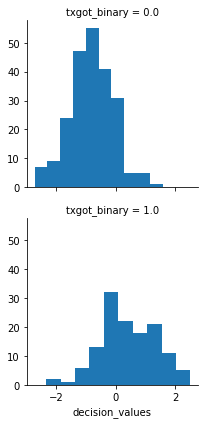

In [12]:
g = sns.FacetGrid(text_df,  row="txgot_binary")
g = g.map(plt.hist, "decision_values")